本节课的学习目标
·理解词袋模型与TF-IDF的原理
·理解代码每一步的运行逻辑
·学习两种语料预处理的思路（中英文不太一样）
·用样例数据成功运行本代码
·尝试对比并理解词袋模型与TF-IDF之间的差异
·尝试用自己的数据适当调整本代码，并成功运行

# 词袋模型

词袋模型（Bag of Words，简称 BoW）是自然语言处理（NLP）中常用的文本表示方法，它将文本转化为数值特征（向量），进而可以用于机器学习等高阶处理。词袋模型将语料转化为二维矩阵，横向为所有在训练数据中出现的不重复的词汇（word），纵向为语料各句子或文档（document）。

简单来说，词袋模型可以帮助大家计算词频。

In [1]:
import pandas as pd #数据表
import numpy as np #数组运算
import nltk #英文语料处理
import re #正则表达式（用于数据清洗）
import matplotlib.pyplot as plt #画图
from wordcloud import WordCloud #词云图
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

In [2]:
#导入数据
text_ana=pd.read_csv('text_analysis_twitter.csv')
text_ana=text_ana.drop(['Unnamed: 0'],axis=1)#Unnamed:需要有空格

In [3]:
text_ana

,id,screen_name,time,link,text,source
0,881004944714866688,KamalaHarris,2017-07-01T00:22:01-04:00,https://www.twitter.com/KamalaHarris/statuses/...,Republicans are trying to steal health care fr...,Sprout Social
1,881002538341986304,MarcVeasey,2017-07-01T00:12:28-04:00,https://www.twitter.com/kylegriffin1/statuses/...,RT @kylegriffin1 Rep. Mark Veasay has introduc...,Twitter for Android
2,881001393284419584,RepPaulTonko,2017-07-01T00:07:55-04:00,https://www.twitter.com/RepPaulTonko/statuses/...,A top U.S. science office went dark tonight. N...,Twitter for iPhone
3,881000301007958016,clairecmc,2017-07-01T00:03:34-04:00,https://www.twitter.com/clairecmc/statuses/881...,So the fundraising quarter ends in an hour in ...,Twitter for iPad
4,881015727540637696,tedcruz,2017-07-01T01:04:52-04:00,https://www.twitter.com/larry_kudlow/statuses/...,RT @larry_kudlow Important story @SenTedCruz @...,Twitter for iPhone
...,...,...,...,...,...,...
299995,939743413909549056,RepTedLieu,2017-12-10T01:27:44-05:00,https://www.twitter.com/ReadyLA/statuses/93956...,RT @ReadyLA REPORT FIRE DAMAGE from #CreekFire...,Twitter for iPhone
299996,939743003203301376,RepTedLieu,2017-12-10T01:26:06-05:00,https://www.twitter.com/LAFDtalk/statuses/9397...,RT @LAFDtalk Once a wildfire has burned throug...,Twitter for iPhone
299997,939741567706730497,JuliaBrownley26,2017-12-10T01:20:23-05:00,https://www.twitter.com/SCE/statuses/939739240...,"RT @SCE Update: As of 8:30pm, Saturday, about ...",Twitter Web Client
299998,939739240501596160,SteveKnight25,2017-12-10T01:11:09-05:00,https://www.twitter.com/santaclarita/statuses/...,RT @santaclarita #RyeFire Evening Update (12/9...,Twitter for iPhone


# 数据预处理

In [4]:
#分析语料
#text=list(text_ana['text'])[:100]
#text

In [5]:
#用空格把text连起来，变成一个字符串
#text=" ".join(text)
#text

In [6]:
def preprocess_text(text):
    text=text.lower()
    text=re.sub(r'http\S+','',text)
    return text

# 构建词袋模型

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
text=list(text_ana['text'])[:100]
text=" ".join(text)
lemmatizer=WordNetLemmatizer()
#转换为小写
text=text.lower()
#移除URL
text=re.sub(r'http\S+','',text)
#分词
#tokens=tokenizer.tokenize(text)
#text=text.split(" ")
#移除停用词和非字母字符
#tokens=[
    #lemmatizer.lemmatize(token)
    #for token in text]
#text_bow=" ".join(tokens)
text
#初始化CounVectorizer
vectorizer=CountVectorizer()
#将文本数据转换为词袋特征矩阵
X=vectorizer.fit_transform(text_ana["text"].apply(preprocess_text))
#展示特征矩阵的形状
print('词袋特征矩阵的形状:',X.shape)
#展示词袋模型中的所有特征词
print('特征词列表:',vectorizer.get_feature_names_out())

词袋特征矩阵的形状: (300000, 121376)
特征词列表: ['00' '000' '0000' ... '투표하십시오' '한국어' 'ﬂees']


In [9]:
X.sum(axis=0).A1

array([ 574, 3984,    2, ...,    1,    1,    1])

# 词频统计

In [10]:
#获取词汇表
feature_words=vectorizer.get_feature_names_out()
#计算词频
word_freq=dict(zip(feature_words,X.sum(axis=0).A1))

In [11]:
sorted(word_freq.items(),key=lambda X: X[1],reverse=True)

[('the', 247160),
 ('to', 235370),
 ('of', 112428),
 ('in', 104912),
 ('and', 104025),
 ('for', 102100),
 ('rt', 83461),
 ('on', 72986),
 ('amp', 65500),
 ('is', 64785),
 ('we', 53564),
 ('our', 49736),
 ('this', 45532),
 ('you', 40235),
 ('with', 39027),
 ('it', 38749),
 ('that', 38161),
 ('qt', 35691),
 ('at', 33821),
 ('are', 31301),
 ('will', 29565),
 ('tax', 28529),
 ('my', 27644),
 ('be', 26920),
 ('from', 26202),
 ('today', 24574),
 ('have', 23005),
 ('by', 22865),
 ('more', 22665),
 ('trump', 19894),
 ('bill', 19534),
 ('their', 19129),
 ('about', 18973),
 ('as', 18391),
 ('all', 18295),
 ('not', 18197),
 ('your', 17615),
 ('who', 17098),
 ('can', 15465),
 ('health', 14215),
 ('has', 14119),
 ('an', 13861),
 ('they', 13858),
 ('us', 13825),
 ('here', 13799),
 ('house', 13680),
 ('people', 13486),
 ('great', 13468),
 ('now', 13113),
 ('families', 12838),
 ('must', 12787),
 ('up', 12602),
 ('was', 12513),
 ('need', 12313),
 ('americans', 12279),
 ('help', 12145),
 ('act', 12064),

# 词云图

In [12]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [13]:
from wordcloud import WordCloud

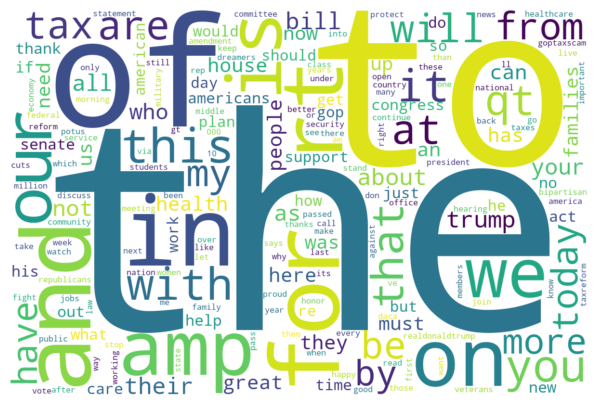

<Figure size 640x480 with 0 Axes>

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

# 根据词袋模型分析结果绘制词云图
wc = WordCloud(
    width=1200, 
    height=800, 
    background_color='white', 
    #font_path='arial.ttf'
).generate_from_frequencies(word_freq)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud_twi.png', dpi=100)